# Part B: Practice

## Logistic Regression on Synthetic and Real-World Data

In [15]:
import numpy as np
from scipy.special import expit
from scipy.optimize import minimize
from sklearn.datasets import make_classification
from sklearn.datasets import make_moons
from matplotlib import pyplot as plt
from seaborn import scatterplot

In [16]:
class LogisticRegression:
    def __init__(self):
        return
    
    def cross_entropy(self):
        return np.sum(- self.y * np.log(expit(np.dot(self.w.T, self.x))) - (1 - self.y) * np.log(1 - expit(np.dot(self.w.R, self.x))))
    
    def g(self, w, x):
        return expit(np.dot(x, w))
    
    def gradient_descent(self):
        w_new = self.w
        for i in range(self.iterations):
            w_old = w_new
            w_new = w_old - self.learning_rate * np.dot((self.g(w_old, self.x) - self.y), x) / self.N
        return w_new
    
    def SGD(self):
        w_new = self.w
        for i in range(self.iterations):
            n = np.random.randint(0, self.N, 1)
            xi = self.x[n]
            yi = self.y[n]
            w_old = w_new
            w_new = w_old - self.learning_rate * np.dot((self.g(w_old, xi) - yi), xi)
        return w_new
    
    def fit(self, x, y, w0=None, learning_rate=0.1, iterations=10000):
        self.x = x
        self.y = y
        self.N = np.size(y)
        self.learning_rate = learning_rate
        self.iterations = iterations
        if w0 is not None:
            self.w = w0
        else:
            self.w = np.random.rand(np.size(x, 1))
        
        self.w = self.SGD()
        return self.w
    
    def predict(self, x):        
        return np.round(self.g(self.w, x))
    
    def score(self, x, y):
        ypredict = self.predict(x)
        return np.sum(ypredict == y) / np.size(y)

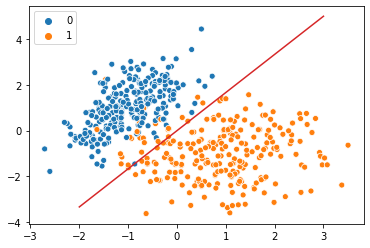

In [21]:
x, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1)
clf = LogisticRegression()
w = clf.fit(x, y)
scatterplot(x[:, 0], x[:, 1], hue=y.reshape(-1))
x1 = np.linspace(-2, 3, num=100)
y1 = (- w[0] * x1) / w[1]
plt.plot(x1, y1, color="tab:red")

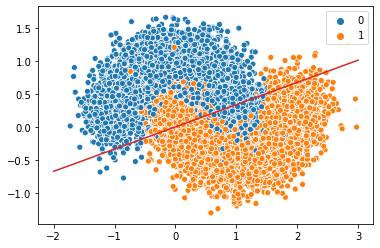

In [4]:
x, y = make_moons(n_samples=10000, noise=0.25, random_state=None)
clf = LogisticRegression()
w = clf.fit(x, y)
scatterplot(x[:, 0], x[:, 1], hue=y.reshape(-1))
x1 = np.linspace(-2, 3, num=100)
y1 = (- w[0] * x1) / w[1]
plt.plot(x1, y1, color="tab:red")

## Dimensionality Reduction

In [5]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from scipy.stats import wilcoxon
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [6]:
datasets = ["abalone", "acute-inflammation", "acute-nephritis", "arrhythmia", "bank", "breast-cancer",
               "car", "cardiotocography-3clases", "congressional-voting", "credit-approval", "iris"]
path = "../UA-ECE523-EngrAppMLData/data/" + datasets[5] + ".csv"
data = np.loadtxt(path, delimiter=",")
X, y = data[:, :-1], data[:, -1]

In [7]:
def score_dataset(X, y, clf):
    pca = PCA(n_components=0.90)
    pcaX = pca.fit_transform(X)
    
    score0 = np.mean(cross_val_score(clf, X, y, cv=5))
    score1 = np.mean(cross_val_score(clf, pcaX, y, cv=5))
    
    return score0, score1

The following code tests whether PCA does better than not using a preprocessing technique with a Logistic Regression classifier.

In [8]:
scores = np.zeros((len(datasets), 2))
i = 0
for dataset in datasets:
    path = "../UA-ECE523-EngrAppMLData/data/" + dataset + ".csv"
    data = np.loadtxt(path, delimiter=",")
    X, y = data[:, :-1], data[:, -1]
    
    clf = LogisticRegression()
    
    scores[i] = score_dataset(X, y, clf)
    i += 1

print(scores)

w, p = wilcoxon(scores[:, 1], scores[:, 0], alternative="greater")
print(w, p)
if p < 0.1:
    print("There is strong evidence that using PCA to preprocess the data does better than not using it at the 0.05 level.")
else:
    print("There is not strong evidence to say that using PCA to preprocess the data does better than not using it at the 0.05 level.")

[[0.64424639 0.54895606]
 [1.         1.        ]
 [1.         1.        ]
 [0.63279761 0.63712768]
 [0.89493571 0.89117636]
 [0.70278282 0.68523896]
 [0.75279944 0.75279944]
 [0.85137586 0.85797073]
 [0.6161041  0.62064956]
 [0.84212625 0.84649554]
 [0.90666667 0.86666667]]
14.0 0.7122984885436232
There is not strong evidence to say that using PCA to preprocess the data does better than not using it at the 0.05 level.


The following code tests whether PCA does better than not using a preprocessing technique with a Naive Bayes Gaussian classifier.

In [9]:
scores = np.zeros((len(datasets), 2))
i = 0
for dataset in datasets:
    path = "../UA-ECE523-EngrAppMLData/data/" + dataset + ".csv"
    data = np.loadtxt(path, delimiter=",")
    X, y = data[:, :-1], data[:, -1]
    
    clf = GaussianNB()
    
    scores[i] = score_dataset(X, y, clf)
    i += 1

print(scores)

w, p = wilcoxon(scores[:, 1], scores[:, 0], alternative="greater")
print(w, p)
if p < 0.1:
    print("There is strong evidence that using PCA to preprocess the data does better than not using it at the 0.05 level.")

[[0.57052789 0.55591593]
 [0.82282609 0.94166667]
 [0.91666667 1.        ]
 [0.14167139 0.33788957]
 [0.82504327 0.88608786]
 [0.67120387 0.66067756]
 [0.69498252 0.77774566]
 [0.71309473 0.85422038]
 [0.55881267 0.57496051]
 [0.79724011 0.80878173]
 [0.95333333 0.89333333]]
57.0 0.016427109964321847
There is strong evidence that using PCA to preprocess the data does better than not using it at the 0.05 level.


## Density Estimation in Practice

In [10]:
from sklearn.neighbors import KernelDensity

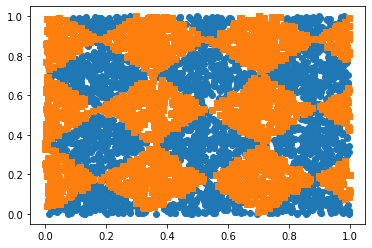

<Figure size 432x288 with 0 Axes>

In [11]:
def gen_cb(N, a, alpha): 
    """
    N: number of points on the checkerboard
    a: width of the checker board (0<a<1)
    alpha: rotation of the checkerboard in radians 
    """
    d = np.random.rand(N, 2).T
    d_transformed = np.array([d[0]*np.cos(alpha)-d[1]*np.sin(alpha), 
                              d[0]*np.sin(alpha)+d[1]*np.cos(alpha)]).T
    s = np.ceil(d_transformed[:,0]/a)+np.floor(d_transformed[:,1]/a)
    lab = 2 - (s%2)
    data = d.T
    return data, lab 


X, y = gen_cb(5000, .25, np.pi/4)
y -= 1
plt.figure()
plt.plot(X[y==0, 0], X[y==0, 1], 'o')
plt.plot(X[y==1, 0], X[y==1, 1], 's')
plt.show()
plt.clf()

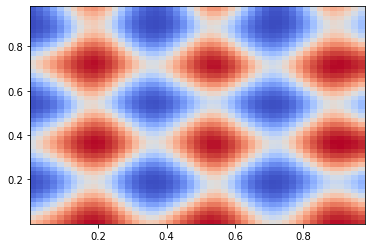

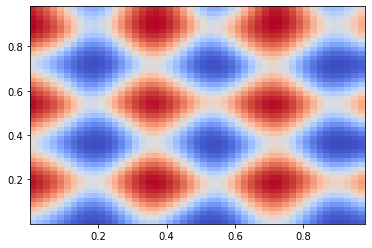

In [12]:
prior = np.array([(y == 0).sum() / np.size(y), (y == 1).sum() / np.size(y)])

x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
zz = np.stack((xx.ravel(), yy.ravel()), axis=1)

like = [0, 0]
kerneldensity = KernelDensity(bandwidth=0.05)
kerneldensity.fit(X[y==0])
like[0] = np.exp(kerneldensity.score_samples(zz)).reshape((np.size(xx, 0), np.size(xx, 0)))

kerneldensity = KernelDensity(bandwidth=0.05)
kerneldensity.fit(X[y==1])
like[1] = np.exp(kerneldensity.score_samples(zz)).reshape((np.size(xx, 0), np.size(xx, 0)))

evid = like[0] * prior[0] + like[1] * prior[1]

post = np.zeros((2, np.size(xx, 0), np.size(xx, 0)))
post[0] = like[0] * prior[0] / evid
post[1] = like[1] * prior[1] / evid

plt.pcolormesh(xx, yy, post[0], cmap="coolwarm")
plt.show()
plt.pcolormesh(xx, yy, post[1], cmap="coolwarm")
plt.show()